In [16]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import maxflow

In [17]:
noisy_image = Image.open('../output_mask_test_4_resize.png')
noisy_image_np = np.asarray(noisy_image)

In [18]:
denoised = cv2.fastNlMeansDenoising(noisy_image_np, None, 10, 10, 7)

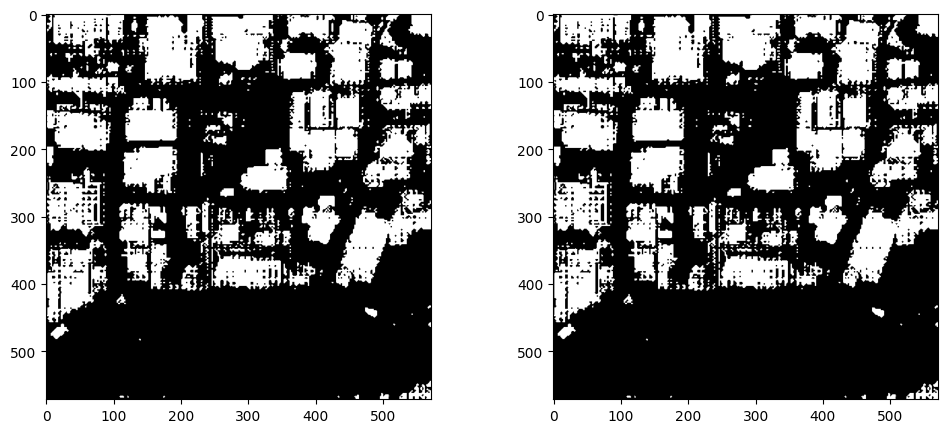

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax[0].imshow(noisy_image_np, cmap='gray')
ax[1].imshow(denoised, cmap='gray')

In [26]:
noisy_image_np.shape

(572, 572)

(572, 572)


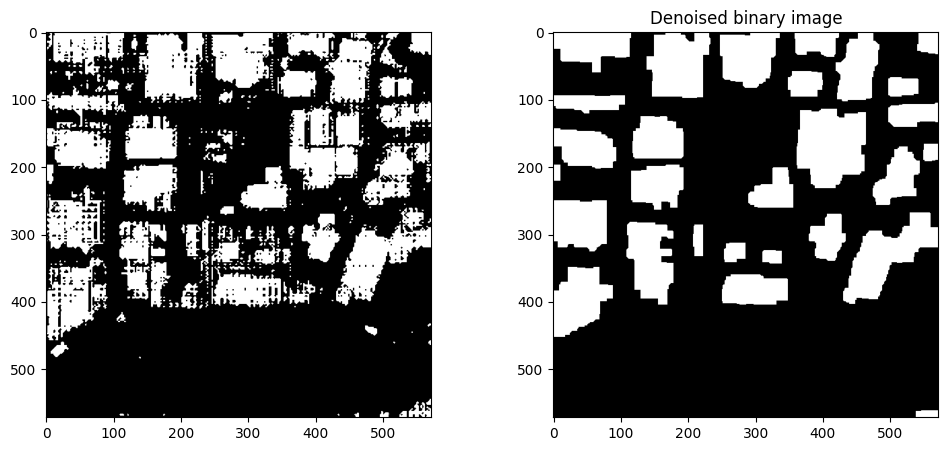

In [25]:
# Important parameter
# Higher values means making the image smoother
smoothing = 1000

# Load the image and convert it to grayscale image
# image_path = 'your_image.png'
# img = cv2.imread('image_path')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = 255 * (img > 128).astype(np.uint8)

# Create the graph.
g = maxflow.Graph[int]()
# Add the nodes. nodeids has the identifiers of the nodes in the grid.
nodeids = g.add_grid_nodes(noisy_image_np.shape)
# Add non-terminal edges with the same capacity.
g.add_grid_edges(nodeids, smoothing)
# Add the terminal edges. The image pixels are the capacities
# of the edges from the source node. The inverted image pixels
# are the capacities of the edges to the sink node.
g.add_grid_tedges(nodeids, noisy_image_np, 255-noisy_image_np)

# Find the maximum flow.
g.maxflow()
# Get the segments of the nodes in the grid.
sgm = g.get_grid_segments(nodeids)

# The labels should be 1 where sgm is False and 0 otherwise.
img_denoised = np.logical_not(sgm).astype(np.uint8) * 255
print(img_denoised.shape)

# Show the result.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax[0].imshow(noisy_image_np, cmap='gray')
plt.title('Binary image')
plt.title('Denoised binary image')
ax[1].imshow(img_denoised, cmap='gray')
plt.show()
